In [1]:
import rdata
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
parsed = rdata.parser.parse_file("f_data_sm.rda")
converted = rdata.conversion.convert(parsed)

c:\program files\python38\lib\site-packages\rdata\conversion\_conversion.py:669: UserWarning: Missing constructor for R class "POSIXct". The constructor for class "POSIXt" will be used instead.
  warnings.warn(
c:\program files\python38\lib\site-packages\rdata\conversion\_conversion.py:669: UserWarning: Missing constructor for R class "POSIXt". The underlying R object is returned instead.
  warnings.warn(


In [3]:
df = pd.DataFrame(converted['f_data_sm'])
print(df.head())

   SEASON  COUNTRY          LEAGUE         DATE     HOMETEAM        AWAYTEAM  \
1  1994.0  England  Premier League  745286400.0      Arsenal        Coventry   
2  1994.0  England  Premier League  745286400.0  Aston Villa             QPR   
3  1994.0  England  Premier League  745286400.0      Chelsea       Blackburn   
4  1994.0  England  Premier League  745286400.0    Liverpool  Sheffield Weds   
5  1994.0  England  Premier League  745286400.0     Man City           Leeds   

  FTSC FTR  FTHG  FTAG  FTTG   H   D   A  
1  0-3   A   0.0   3.0   3.0 NaN NaN NaN  
2  4-1   H   4.0   1.0   5.0 NaN NaN NaN  
3  1-2   A   1.0   2.0   3.0 NaN NaN NaN  
4  2-0   H   2.0   0.0   2.0 NaN NaN NaN  
5  1-1   D   1.0   1.0   2.0 NaN NaN NaN  


In [4]:
df_avg = df.groupby(["SEASON","LEAGUE"],as_index=False)[["FTHG","FTAG"]].mean().sort_values(by='FTHG',ascending=False)
print(df_avg.head())

     SEASON          LEAGUE      FTHG      FTAG
246  2019.0      Eredivisie  2.006536  1.460784
59   2000.0  Jupiler League  1.990196  1.398693
36   1998.0      Eredivisie  1.950980  1.323529
166  2011.0      Eredivisie  1.944444  1.281046
68   2001.0   Futbol Ligi 1  1.921569  1.395425


<AxesSubplot:xlabel='SEASON'>

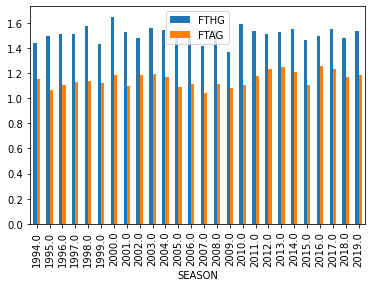

In [5]:
df_avg[df_avg["LEAGUE"]=="Premier League"].sort_values(by='SEASON').plot(kind="bar",x="SEASON",y=["FTHG","FTAG"])

In [6]:
df_best_attack = df[df["SEASON"]==2019].groupby(["HOMETEAM"],as_index=False)[["FTHG"]].sum().sort_values(by=['FTHG'],ascending=False)
print(df_best_attack.head())

          HOMETEAM  FTHG
3             Ajax  70.0
141       Paris SG  63.0
26         Benfica  63.0
137  PSV Eindhoven  58.0
115       Man City  57.0


In [7]:
df_best_defense = df[df["SEASON"]==2019].groupby(["HOMETEAM"],as_index=False)[["FTAG"]].sum().sort_values(by=['FTAG'],ascending=True)
print(df_best_defense.head())

          HOMETEAM  FTAG
136           PAOK   5.0
0              AEK   6.0
137  PSV Eindhoven   7.0
146        Rangers   7.0
41          Celtic   7.0


In [8]:
df["FTDG"] = df.apply(lambda row: abs(row.FTHG - row.FTAG), axis=1)
print(df.head())

   SEASON  COUNTRY          LEAGUE         DATE     HOMETEAM        AWAYTEAM  \
1  1994.0  England  Premier League  745286400.0      Arsenal        Coventry   
2  1994.0  England  Premier League  745286400.0  Aston Villa             QPR   
3  1994.0  England  Premier League  745286400.0      Chelsea       Blackburn   
4  1994.0  England  Premier League  745286400.0    Liverpool  Sheffield Weds   
5  1994.0  England  Premier League  745286400.0     Man City           Leeds   

  FTSC FTR  FTHG  FTAG  FTTG   H   D   A  FTDG  
1  0-3   A   0.0   3.0   3.0 NaN NaN NaN   3.0  
2  4-1   H   4.0   1.0   5.0 NaN NaN NaN   3.0  
3  1-2   A   1.0   2.0   3.0 NaN NaN NaN   1.0  
4  2-0   H   2.0   0.0   2.0 NaN NaN NaN   2.0  
5  1-1   D   1.0   1.0   2.0 NaN NaN NaN   0.0  


In [9]:
df = df.drop(["FTSC","FTHG","FTAG","H","D","A","DATE"],axis=1)
print(df)

       SEASON  COUNTRY             LEAGUE       HOMETEAM        AWAYTEAM FTR  \
1      1994.0  England     Premier League        Arsenal        Coventry   A   
2      1994.0  England     Premier League    Aston Villa             QPR   H   
3      1994.0  England     Premier League        Chelsea       Blackburn   A   
4      1994.0  England     Premier League      Liverpool  Sheffield Weds   H   
5      1994.0  England     Premier League       Man City           Leeds   D   
...       ...      ...                ...            ...             ...  ..   
87812  2019.0   Greece  Ethniki Katigoria      Atromitos       OFI Crete   A   
87813  2019.0   Greece  Ethniki Katigoria       Giannina            PAOK   A   
87814  2019.0   Greece  Ethniki Katigoria         Larisa      Olympiakos   A   
87815  2019.0   Greece  Ethniki Katigoria    Levadeiakos             AEK   A   
87816  2019.0   Greece  Ethniki Katigoria  Panathinaikos     Panetolikos   H   

       FTTG  FTDG  
1       3.0   3.0  

In [10]:
df["SEASON"] = df["SEASON"].astype(int)
print(df)

       SEASON  COUNTRY             LEAGUE       HOMETEAM        AWAYTEAM FTR  \
1        1994  England     Premier League        Arsenal        Coventry   A   
2        1994  England     Premier League    Aston Villa             QPR   H   
3        1994  England     Premier League        Chelsea       Blackburn   A   
4        1994  England     Premier League      Liverpool  Sheffield Weds   H   
5        1994  England     Premier League       Man City           Leeds   D   
...       ...      ...                ...            ...             ...  ..   
87812    2019   Greece  Ethniki Katigoria      Atromitos       OFI Crete   A   
87813    2019   Greece  Ethniki Katigoria       Giannina            PAOK   A   
87814    2019   Greece  Ethniki Katigoria         Larisa      Olympiakos   A   
87815    2019   Greece  Ethniki Katigoria    Levadeiakos             AEK   A   
87816    2019   Greece  Ethniki Katigoria  Panathinaikos     Panetolikos   H   

       FTTG  FTDG  
1       3.0   3.0  

In [11]:
df.dropna(inplace=True)

In [12]:
df[["COUNTRY","LEAGUE","HOMETEAM","AWAYTEAM"]] = df[["COUNTRY","LEAGUE","HOMETEAM","AWAYTEAM"]].apply(lambda x: x.factorize()[0])
print(df)

       SEASON  COUNTRY  LEAGUE  HOMETEAM  AWAYTEAM FTR  FTTG  FTDG
1        1994        0       0         0         0   A   3.0   3.0
2        1994        0       0         1         1   H   5.0   3.0
3        1994        0       0         2         2   A   3.0   1.0
4        1994        0       0         3         3   H   2.0   2.0
5        1994        0       0         4         4   D   2.0   0.0
...       ...      ...     ...       ...       ...  ..   ...   ...
87812    2019        9       8       381       479   A   2.0   2.0
87813    2019        9       8       343       198   A   2.0   2.0
87814    2019        9       8       187       183   A   3.0   3.0
87815    2019        9       8       382       192   A   3.0   3.0
87816    2019        9       8       196       431   H   4.0   4.0

[87814 rows x 8 columns]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[["SEASON", "COUNTRY", "LEAGUE", "HOMETEAM", "AWAYTEAM", "FTTG", "FTDG"]]
y = df["FTR"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

['H' 'D' 'D' ... 'H' 'H' 'D']


In [19]:
from sklearn.metrics import precision_score

In [20]:
pr = precision_score(y_test, y_pred, average='macro')
print(pr)

0.7447959262337469


In [21]:
from sklearn.svm import SVC

In [22]:
model_SVC = SVC(random_state=912, kernel='rbf')
model_SVC.fit(X_train,y_train)

SVC(random_state=912)

In [23]:
y_pred_SVC = model_SVC.predict(X_test)

In [27]:
pr_SVC = precision_score(y_test, y_pred_SVC, average='macro', zero_division=True)
print(pr_SVC)

0.8241758241758242
